#### Flight price prediction with train & test data set

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
Train_data = pd.read_excel("Flight_Data_Train.xlsx")

In [3]:
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#checking shape of data 
Train_data.shape

(10683, 11)

In [5]:

Train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
# removing duplicate from data
Train_data.drop_duplicates(inplace=True)

In [7]:
#after removing duplicate checking shape
Train_data.shape

(10463, 11)

In [8]:
#200 duplicate removed

In [9]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [10]:
# Identifing the type of Problem- Output: Price is contionus data so we use regression models

In [11]:
# there is no null value in data


In [12]:
# checking missing value in data
Train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
#there is missing value in 2 attribute - Route ,Total_stops

In [14]:
Train_data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [15]:
Train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [16]:
#droping  nan value from data
Train_data.dropna(inplace=True)

In [17]:
#checking missing value again
Train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

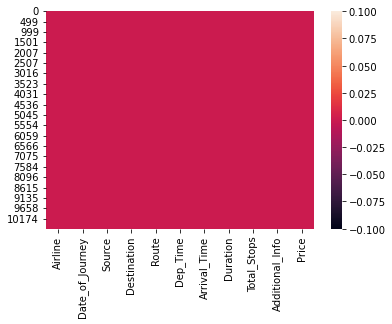

In [18]:
#looking missing value 
sns.heatmap(Train_data.isna())
plt.show()

In [19]:
#now there is no missing value

E:\anacoda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


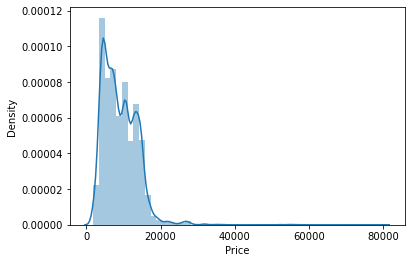

In [20]:
sns.distplot(Train_data['Price'])
plt.show()

E:\anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

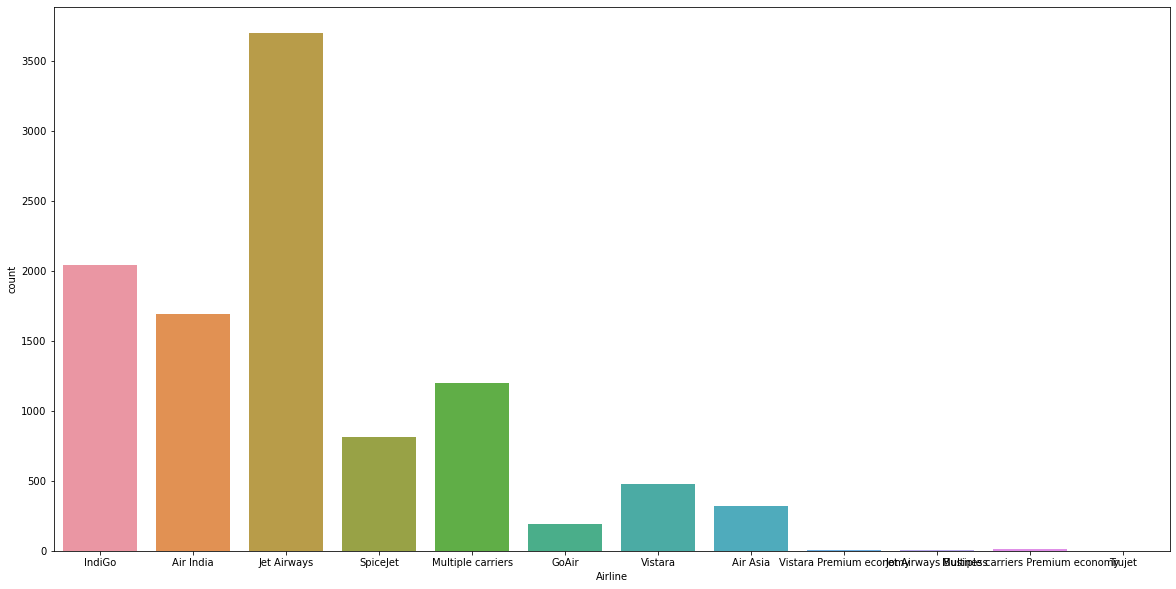

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(Train_data['Airline'])

In [22]:
import warnings
warnings.filterwarnings('ignore')

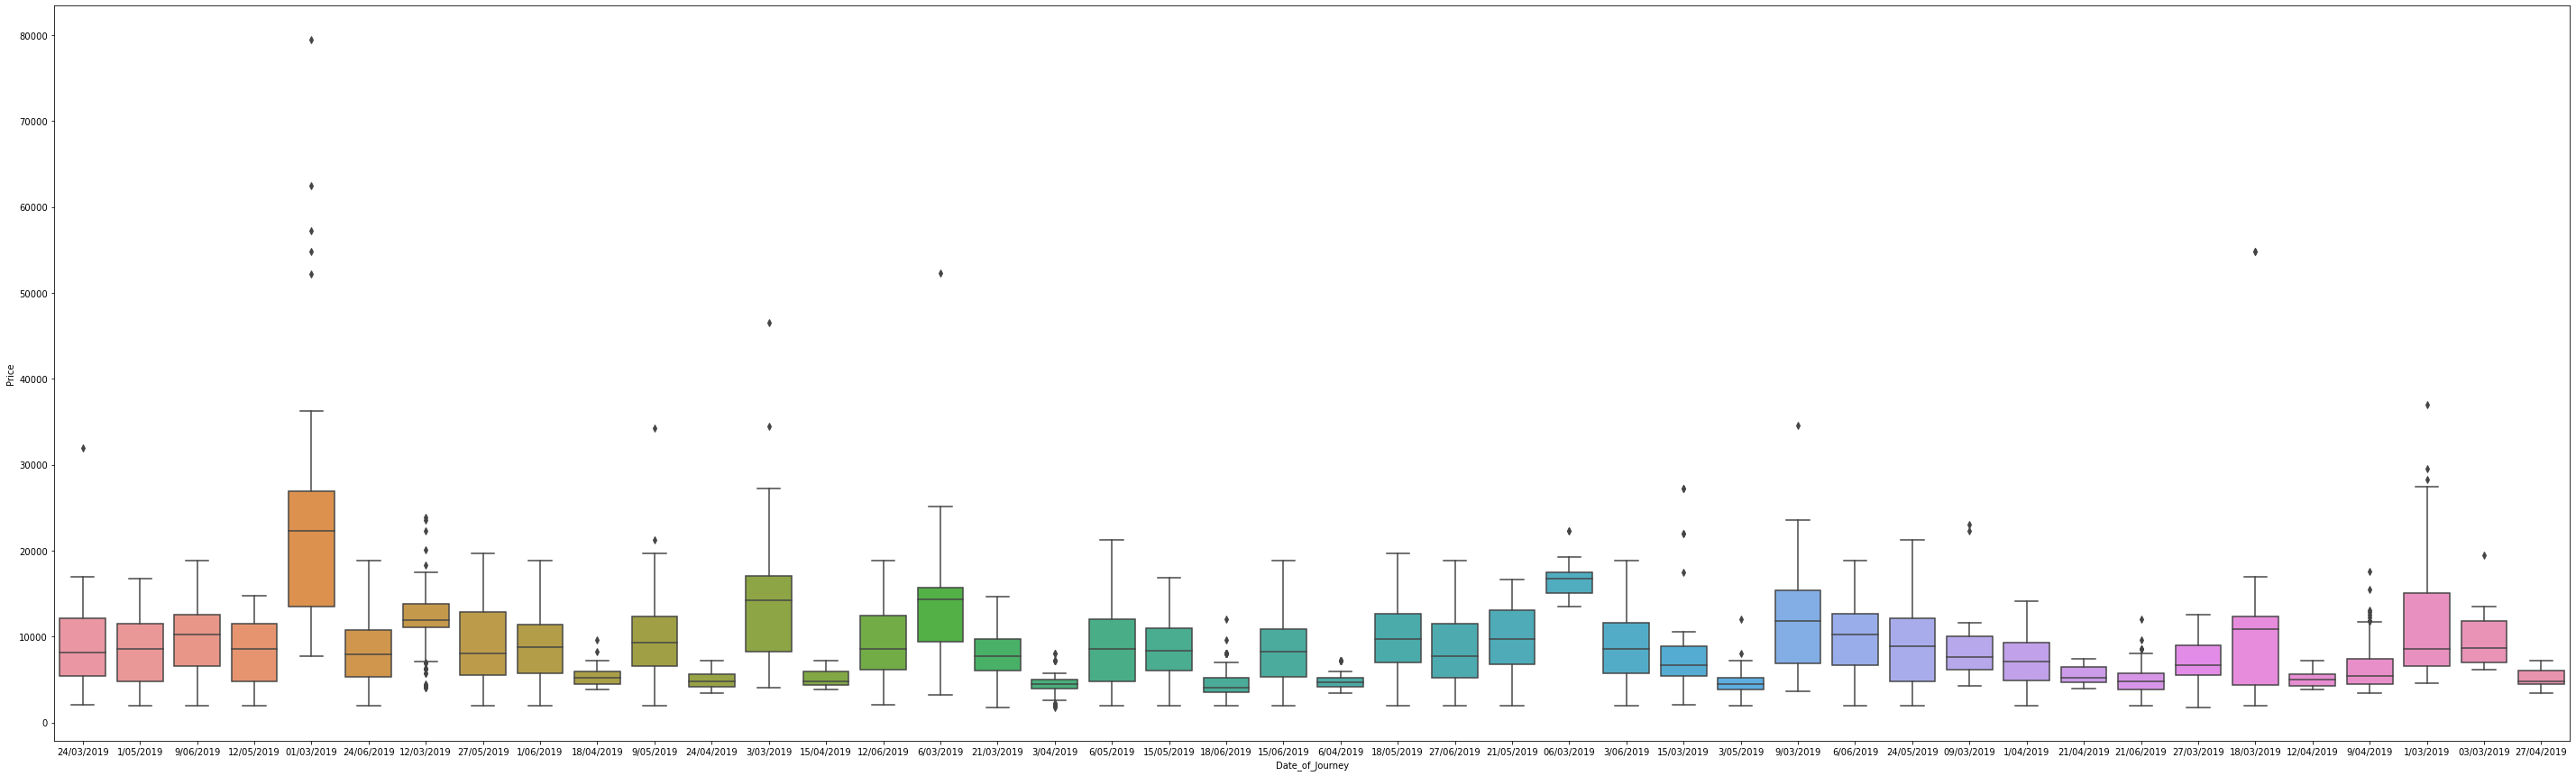

In [23]:
plt.figure(figsize = (50,15))
sns.boxplot(Train_data['Date_of_Journey'], Train_data['Price'])
plt.show()

In [24]:
# counting value of source
Train_data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

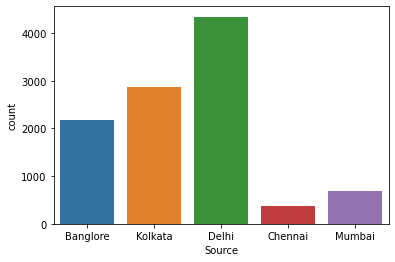

In [25]:
sns.countplot(Train_data['Source'])
plt.show()

In [26]:
# we see that Maximum number of flight Source was Delhi, & than Kolkata  Destination.

In [27]:
Train_data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

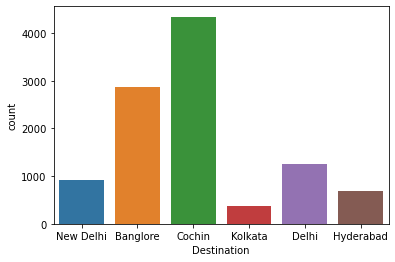

In [28]:
sns.countplot(Train_data['Destination'])
plt.show()

In [29]:
# Cochin  and banglore has highest destination.

In [30]:
Train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

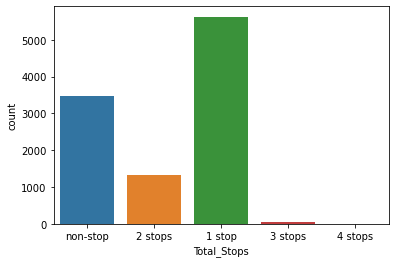

In [31]:
sns.countplot(Train_data['Total_Stops'])
plt.show()

In [32]:
# Most of flight has 1 stop is 5625 and non stop flight has 3475

<AxesSubplot:xlabel='Duration', ylabel='count'>

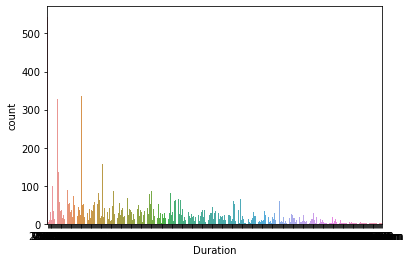

In [33]:
sns.countplot(Train_data['Duration'])

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

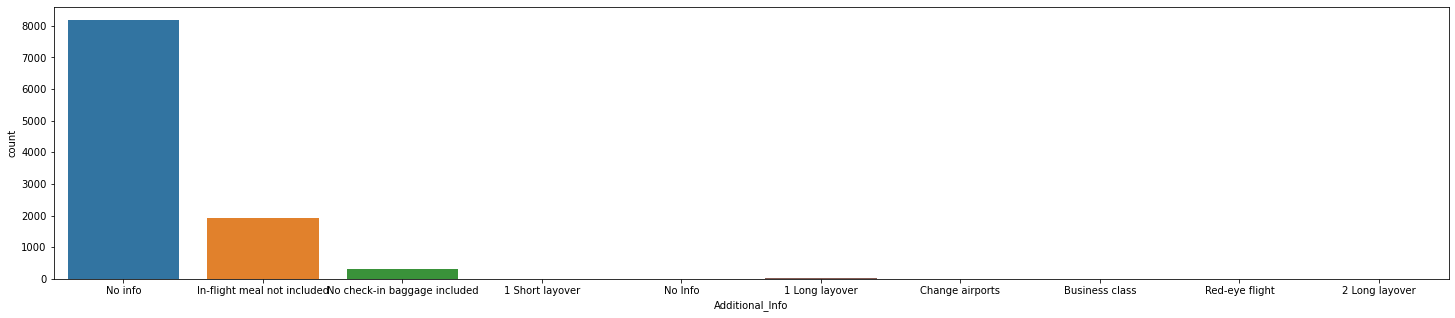

In [34]:
plt.figure(figsize=(25,5))
sns.countplot(Train_data['Additional_Info'])

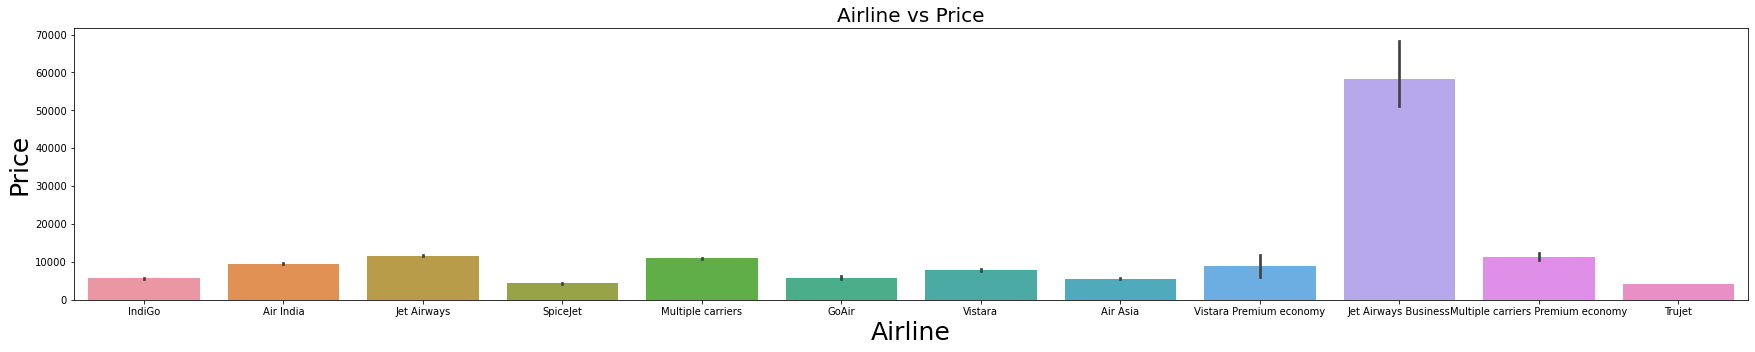

In [35]:
plt.figure(figsize=(30,5))
sns.barplot(Train_data['Airline'], Train_data['Price'])
plt.xlabel('Airline', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.title('Airline vs Price', fontsize=20)
plt.show()

In [36]:
# JetAirway flight are very expensive compare to other

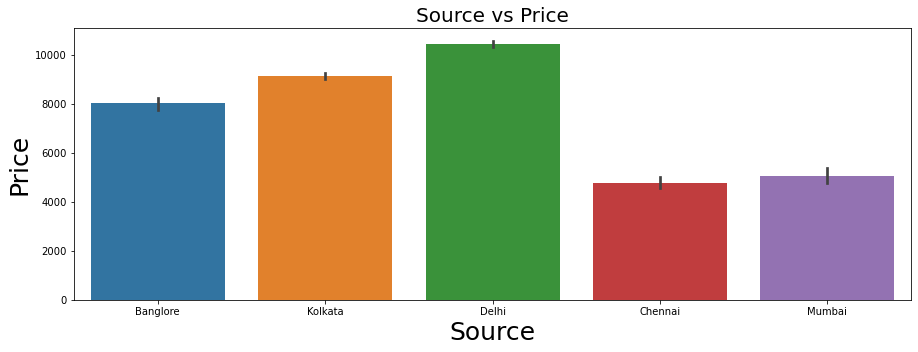

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(Train_data['Source'], Train_data['Price'])
plt.xlabel('Source', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.title('Source vs Price', fontsize=20)
plt.show()

In [38]:
# Highest price is delhi, Kolkata  and then banglore 

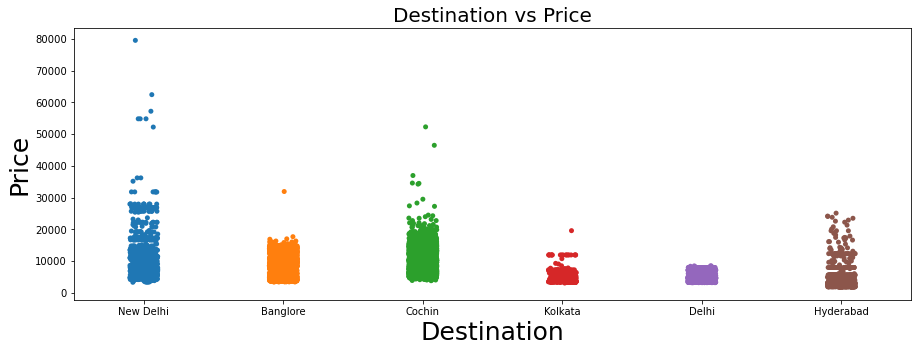

In [39]:
plt.figure(figsize=(15,5))
sns.stripplot(Train_data['Destination'], Train_data['Price'])
plt.xlabel('Destination', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.title('Destination vs Price', fontsize=20)
plt.show()

In [40]:
# Destination price of Kolkata and delhi and  Hyderbad is low comapare tp other Destination

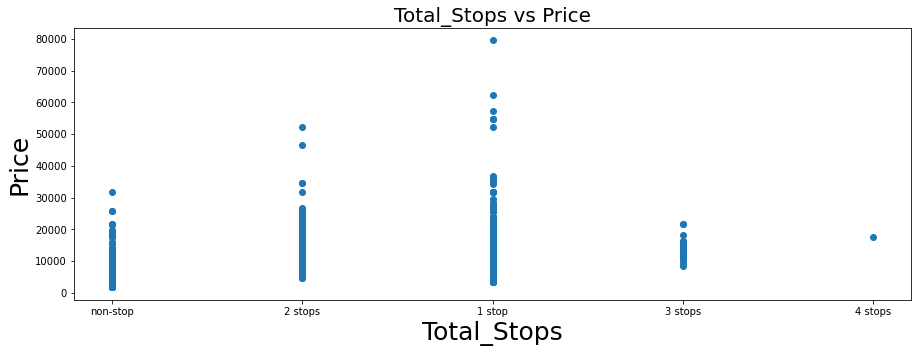

In [41]:
plt.figure(figsize=(15,5))
plt.scatter(Train_data['Total_Stops'], Train_data['Price'])
plt.xlabel('Total_Stops', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.title('Total_Stops vs Price', fontsize=20)
plt.show()

In [42]:
# Flight which have one stop & two stops has highest price,
# Flights which have four stops have the lowest prices,
# Flights which have zero and three stops have low prices.

In [43]:
# split Date_of_Journey of attribute in date,month,year
Train_data['Date'] = Train_data['Date_of_Journey'].str.split('/').str[0]
Train_data['Month'] = Train_data['Date_of_Journey'].str.split('/').str[1]
Train_data['Year'] = Train_data['Date_of_Journey'].str.split('/').str[2]

In [44]:
Train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019


In [45]:
#droping date_of_journey
Train_data = Train_data.drop(['Date_of_Journey'], axis=1)

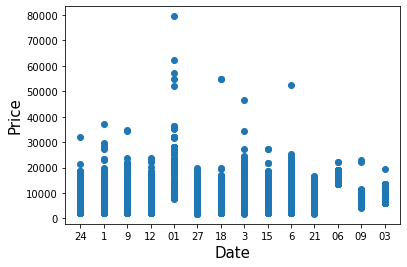

In [46]:
plt.scatter(x=Train_data['Date'],y=Train_data['Price'])
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Price', fontsize= 15)
plt.show()

In [47]:
# Flights have the highest prices on the first day of months  and lowest at 21 day of month

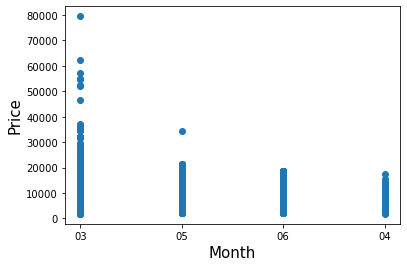

In [48]:
plt.scatter(x=Train_data['Month'], y=Train_data['Price'])
plt.xlabel('Month', fontsize= 15)
plt.ylabel('Price', fontsize= 15)
plt.show()

In [49]:
# Flights have the highest prices in the March, and may

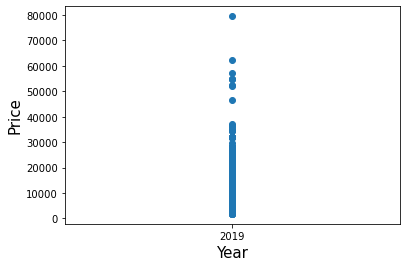

In [50]:
plt.scatter(x=Train_data['Year'], y=Train_data['Price'])
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Price', fontsize= 15)
plt.show()

In [51]:
# we have 2019 year data only

In [52]:

Train_data['Route1']=Train_data['Route'].str.split('→').str[0]
Train_data['Route2']=Train_data['Route'].str.split('→').str[1]
Train_data['Route3']=Train_data['Route'].str.split('→').str[2]
Train_data['Route4']=Train_data['Route'].str.split('→').str[3]
Train_data['Route5']=Train_data['Route'].str.split('→').str[4]

In [53]:
Train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN


In [54]:
Train_data['Route1'].isna().sum()

0

In [55]:
Train_data['Route2'].isna().sum()

0

In [56]:
Train_data['Route3'].isna().sum()

3475

In [57]:
'''as we see there is null value in Route3'''
Train_data['Route3'].fillna(Train_data['Route3'].mode()[0],inplace=True)

In [58]:
Train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,COK,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN


In [59]:
Train_data['Route4'].isna().sum()

9100

In [60]:
Train_data['Route5'].isna().sum()

10418

In [61]:
'''Route4 and Route5 columns have more than 50% null values. So, we will drop these columns'''
Train_data.drop(['Route4','Route5'],axis=1,inplace=True)

In [62]:
Train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,COK
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL


In [63]:
Train_data['Dep_Hours']=Train_data['Dep_Time'].str.split(':').str[0].astype('int')
Train_data['Dep_Minutes']=Train_data['Dep_Time'].str.split(':').str[1].astype('int')

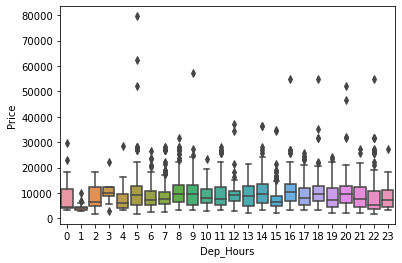

In [64]:
sns.boxplot(x=Train_data['Dep_Hours'],y=Train_data['Price'])
plt.show()

In [65]:
# Flights which departed at 1 AM for departure have the lowest prices, 3 AM, 10 AM, 12 PM, 13 PM and 15 PM have also low prices,
# 5 AM have the highest prices,9 AM, 16 PM, 18 PM, 20 PM and 22 PM have also high prices.

In [66]:
Train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,COK,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,16,50


In [67]:
Train_data['Arrival_Time']=Train_data['Arrival_Time'].str.split(' ').str[0]

In [68]:
Train_data['Arrival_hour']=Train_data['Arrival_Time'].str.split(':').str[0]

In [69]:
Train_data['Arrival_hour']=Train_data['Arrival_hour'].astype('int')

In [70]:
Train_data['Arrival_minute']=Train_data['Arrival_Time'].str.split(':').str[1]

In [71]:
Train_data['Arrival_minute']=Train_data['Arrival_minute'].astype('int')

In [72]:
Train_data['Duration_Hours']=Train_data['Duration'].str.split('h').str[0]

In [73]:
Train_data['Duration_Hours']=Train_data['Duration_Hours'].replace('5m','0')

In [74]:
Train_data['Duration_Hours']=Train_data['Duration_Hours'].astype('int')

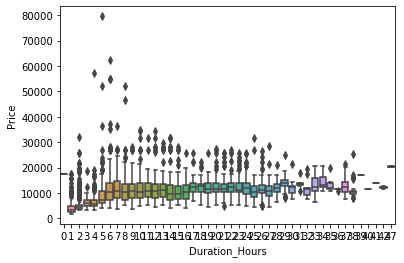

In [75]:
sns.boxplot(x=Train_data['Duration_Hours'],y=Train_data['Price'])
plt.show()

In [76]:
# Flight has highest 5 hours duration

In [77]:
Train_data['Duration_Minutes']=Train_data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [78]:
Train_data['Duration_Minutes']=Train_data['Duration_Minutes'].fillna(Train_data['Duration_Minutes'].mode()[0])

In [79]:
Train_data['Duration_Minutes']=Train_data['Duration_Minutes'].astype('int')

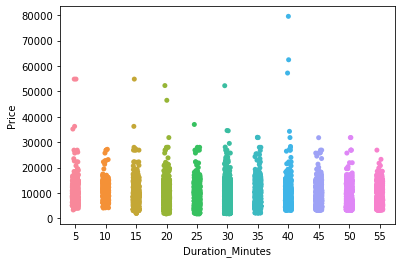

In [80]:
sns.stripplot(x=Train_data['Duration_Minutes'],y=Train_data['Price'])
plt.show()

In [81]:
# As we have split 'Route','Dep_Time' , 'Arrival_Time','Duration' columns. So, we well drop these columns.
Train_data.drop(['Route','Dep_Time', 'Arrival_Time','Duration'],axis=1,inplace=True)

In [82]:
Train_data.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes,Arrival_hour,Arrival_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,2019,BLR,DEL,COK,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,9,25,4,25,19,30
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,16,50,21,35,4,45


In [83]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  object
 4   Additional_Info   10462 non-null  object
 5   Price             10462 non-null  int64 
 6   Date              10462 non-null  object
 7   Month             10462 non-null  object
 8   Year              10462 non-null  object
 9   Route1            10462 non-null  object
 10  Route2            10462 non-null  object
 11  Route3            10462 non-null  object
 12  Dep_Hours         10462 non-null  int32 
 13  Dep_Minutes       10462 non-null  int32 
 14  Arrival_hour      10462 non-null  int32 
 15  Arrival_minute    10462 non-null  int32 
 16  Duration_Hours    10462 non-null  int32 
 17  Duration_Min

In [84]:
# we separate object datatypes
object_columns = []
for i in Train_data.columns:
    if Train_data[i].dtypes=='object':
        object_columns.append(i)

In [85]:
object_columns

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date',
 'Month',
 'Year',
 'Route1',
 'Route2',
 'Route3']

In [86]:
# Now we convert object datypes into numerical datatype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for j in object_columns:
    Train_data[j] = le.fit_transform(Train_data[j])

In [87]:
Train_data.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes,Arrival_hour,Arrival_minute,Duration_Hours,Duration_Minutes
0,3,0,5,4,8,3897,9,0,0,0,13,6,22,20,1,10,2,50
1,1,3,0,1,8,7662,4,2,0,2,25,1,5,50,13,15,7,25
2,4,2,1,1,8,13882,13,3,0,3,32,4,9,25,4,25,19,30
3,3,3,0,0,8,6218,5,2,0,2,34,3,18,5,23,30,5,25
4,3,0,5,0,8,13302,0,0,0,0,34,8,16,50,21,35,4,45


In [88]:
Train_data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes,Arrival_hour,Arrival_minute,Duration_Hours,Duration_Minutes
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,1.953642,1.439495,1.463105,7.396483,9026.790289,8.417320,1.701491,0.0,2.004970,11.784649,5.738960,12.478494,24.404989,13.387689,24.719939,10.026190,31.094437
std,2.364627,1.186327,1.481015,1.821371,1.212030,4624.849541,3.223474,1.163802,0.0,1.208648,7.833805,2.659753,5.727227,18.815719,6.855547,16.570450,8.378023,14.155880
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5224.000000,6.000000,0.000000,0.0,1.000000,7.000000,4.000000,8.000000,5.000000,8.000000,10.000000,2.000000,20.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8266.000000,9.000000,2.000000,0.0,2.000000,7.000000,6.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12344.750000,11.000000,3.000000,0.0,3.000000,14.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,13.000000,3.000000,0.0,4.000000,44.000000,28.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [89]:
#checking correlation
Train_data.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes,Arrival_hour,Arrival_minute,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.012172,0.015942,0.034396,-0.058220,-0.036491,0.025755,0.026083,NaN,0.039836,-0.063741,-0.089960,-0.032267,-0.062421,-0.005438,-0.073045,-0.151962,-0.028782
Source,-0.012172,1.000000,-0.589992,-0.222859,-0.021587,0.013796,0.186842,0.181072,NaN,0.437508,0.036686,-0.224964,0.060218,-0.056609,0.028257,0.021392,0.167051,-0.237278
Destination,0.015942,-0.589992,1.000000,0.334097,0.024922,-0.065875,-0.291621,-0.362186,NaN,-0.479180,0.084999,0.344581,-0.074056,0.128523,-0.044605,0.016351,-0.255273,0.059539
Total_Stops,0.034396,-0.222859,0.334097,1.000000,0.164639,-0.571991,-0.034467,-0.021409,NaN,-0.442580,0.040194,0.113399,0.040310,0.049338,-0.099351,0.176743,-0.613582,0.186927
Additional_Info,-0.058220,-0.021587,0.024922,0.164639,1.000000,-0.068779,0.018741,-0.049186,NaN,0.020189,0.096554,0.099777,-0.059406,-0.015916,0.021293,0.044321,-0.171039,0.048307
Price,-0.036491,0.013796,-0.065875,-0.571991,-0.068779,1.000000,-0.073780,-0.113396,NaN,0.173508,-0.098391,-0.016138,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.120346
Date,0.025755,0.186842,-0.291621,-0.034467,0.018741,-0.073780,1.000000,0.115311,NaN,0.274491,0.004873,-0.061170,-0.006545,-0.052093,-0.008057,-0.025292,0.018603,-0.038553
Month,0.026083,0.181072,-0.362186,-0.021409,-0.049186,-0.113396,0.115311,1.000000,NaN,0.224097,0.037930,-0.205867,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.018406
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route1,0.039836,0.437508,-0.479180,-0.442580,0.020189,0.173508,0.274491,0.224097,NaN,1.000000,-0.098768,-0.119493,-0.047462,-0.074881,0.021514,-0.172785,0.283602,-0.300543


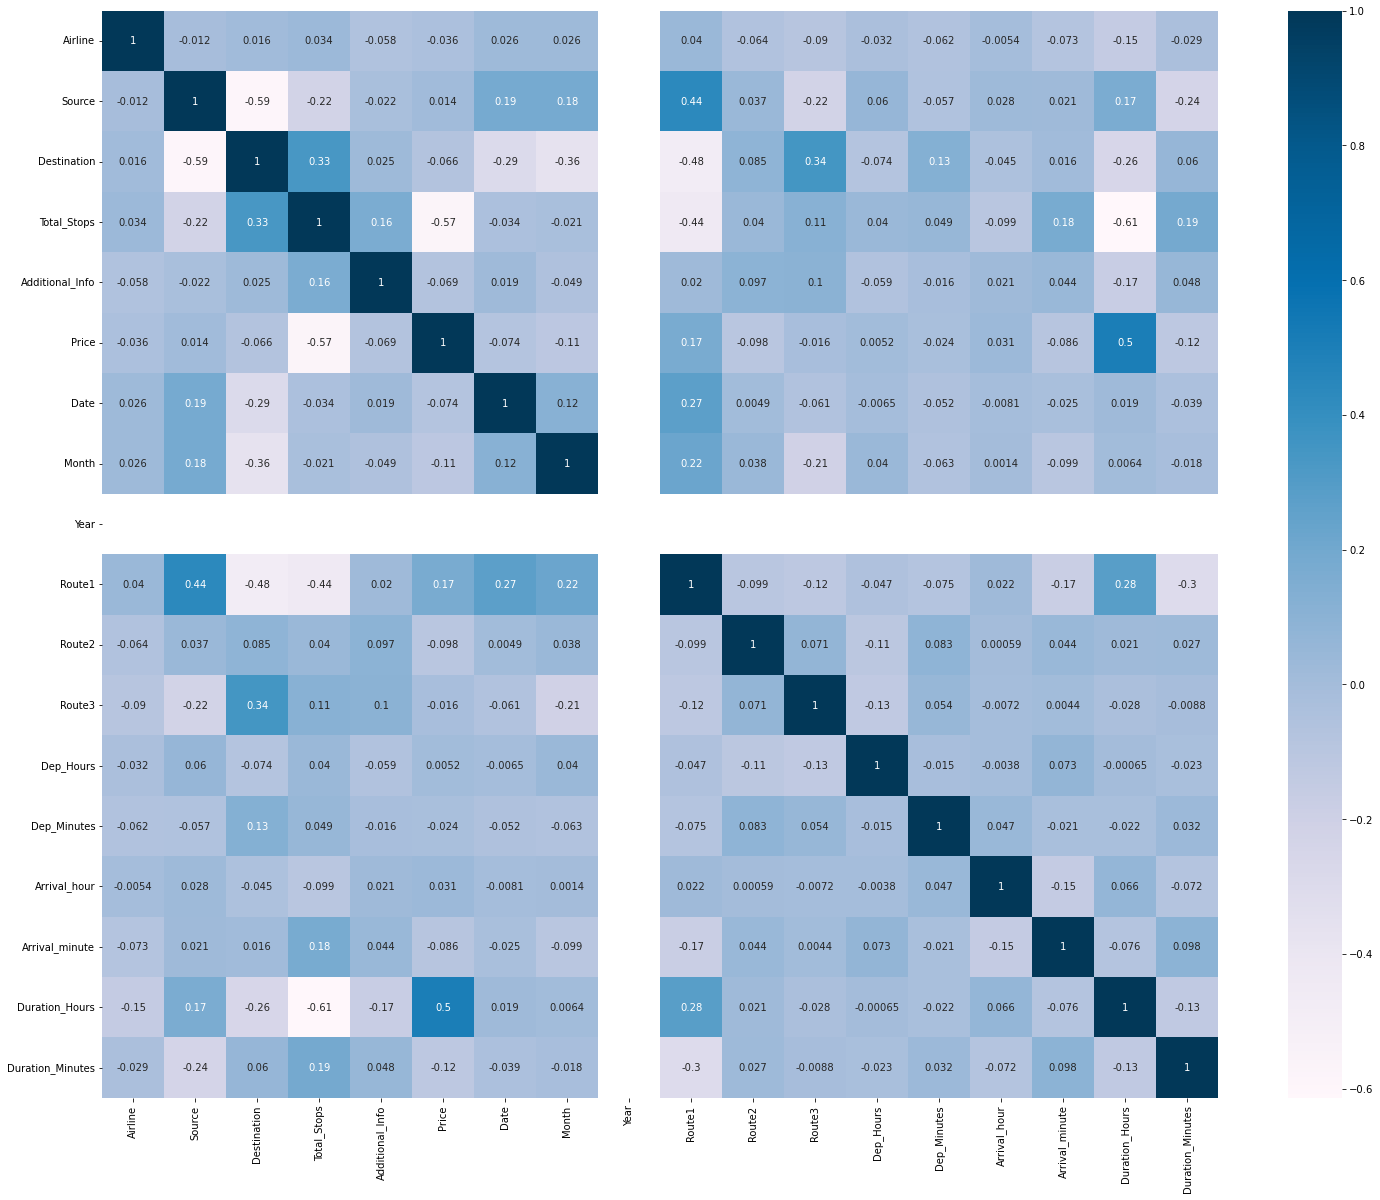

In [90]:
#Checking of correlation of features with each other with heatmap
plt.figure(figsize=(25,20))
sns.heatmap(Train_data.corr(),cmap='PuBu',annot=True)
plt.show()

In [91]:
# Source as positive raltionship with route1
# Price as positive reltionship with  Duaration, & route 1

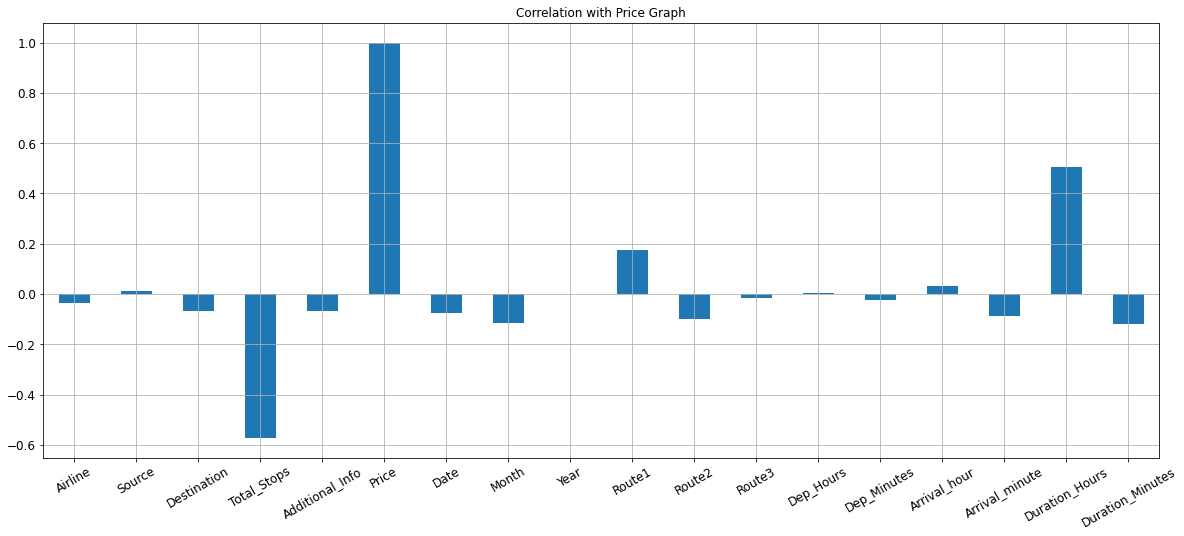

In [92]:
#Correlation with Price with respect to attributes
Train_data.corrwith(Train_data.Price).plot.bar(figsize = (20, 8), 
                                   title = "Correlation with Price Graph", fontsize = 12,rot = 30, grid = True)
plt.show()

In [93]:
# Price as positive corelationship with  Duaration, & route 1
# Price as  highly negative corelationship with Total_stops

In [94]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10462 non-null  int32
 1   Source            10462 non-null  int32
 2   Destination       10462 non-null  int32
 3   Total_Stops       10462 non-null  int32
 4   Additional_Info   10462 non-null  int32
 5   Price             10462 non-null  int64
 6   Date              10462 non-null  int32
 7   Month             10462 non-null  int32
 8   Year              10462 non-null  int32
 9   Route1            10462 non-null  int32
 10  Route2            10462 non-null  int32
 11  Route3            10462 non-null  int32
 12  Dep_Hours         10462 non-null  int32
 13  Dep_Minutes       10462 non-null  int32
 14  Arrival_hour      10462 non-null  int32
 15  Arrival_minute    10462 non-null  int32
 16  Duration_Hours    10462 non-null  int32
 17  Duration_Minutes  10462 non-nul

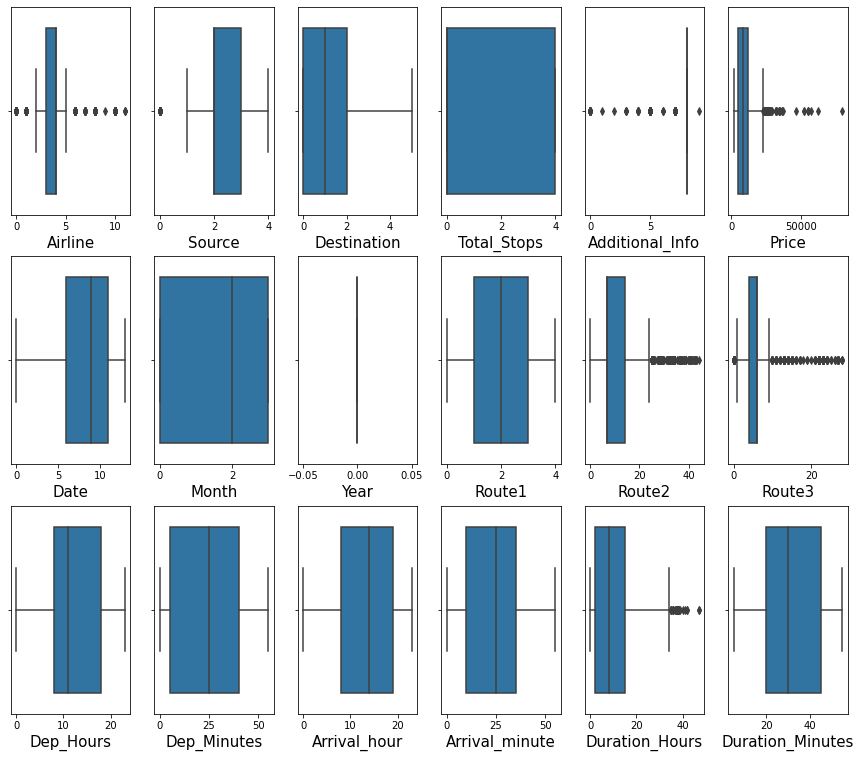

In [95]:
# Chekcing Outlier and skeweness
# let's see how data is distributed for every column
plt.figure(figsize=(15,13), facecolor='white')
plotnumber = 1

for column in Train_data:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(3,6,plotnumber)
        sns.boxplot(Train_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [96]:
# Because of all object dtype we ignore skewness

In [97]:
# Spliting dataset into features and label 
x = Train_data.drop(["Price"], axis=1)
y = Train_data["Price"]

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(x)

In [99]:
# To find the best random state using Linear Regressor model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaler,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.45656090925827997  on Random_state  123


In [100]:
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y,test_size=.30,random_state=maxRS)

In [101]:
#import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR(),AdaBoostRegressor()]

In [103]:
for m in model:
    print("*******************************************************************************")
    
    print('accuracy score of ->', m)
    
    m.fit(x_train,y_train)
    
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y_test,pred))
    
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    
    score=cross_val_score(m,x,y,cv=5)
    
    print(score)
    
    print("cross validation score:  ", abs(score.mean()))
    
    print("Difference between R2 score and cross validatio score is -> ",r2_score(y_test,pred)-abs(score.mean()))
    
    print("--------------------------------**********************--------------------------------------")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.45656090925827997
Mean Absolute Error:      2413.793915533187
Mean Squared error:       10285883.687606832
Root Mean Squared Error:  3207.16131300046
[0.41871536 0.41519936 0.41835554 0.39652168 0.39192025]
cross validation score:   0.40814244040674186
Difference between R2 score and cross validatio score is ->  0.04841846885153811
--------------------------------**********************--------------------------------------
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.899122387569872
Mean Absolute Error:      654.7708379083927
Mean Squared error:       1909349.9268217434
Root Mean Squared Error:  1381.7922878717131
[0.88228777 0.89110078 0.87115833 0.88360105 0.86142616]
cross validation score:   0.8779148178519453
Difference between R

In [104]:
# we that GradientBoostingRegressor give best accuracy  82% and least difference

In [105]:
params={'n_estimators':range(0,200),
        'learning_rate':[.001,0.01,.1],
        'max_depth':[1,2,4],
        'subsample':[.5,.75,1]}

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
gridsearch = GridSearchCV(GradientBoostingRegressor(), param_grid=params,cv = 3, n_jobs = -1)

In [ ]:
gridsearch.fit(x_train,y_train)

In [ ]:
print(gridsearch.best_params_)

In [ ]:
gbr = gridsearch.best_estimator_

In [ ]:
gbr.fit(x_train,y_train)

In [ ]:
print(gbr.score(x_test,y_test))

In [ ]:
y_pred =gbr.predict(x_test)

In [ ]:
accuracy = r2_score(y_test,y_pred)

In [ ]:
print(accuracy)

In [ ]:
#hyperparameter tuning give 88 % accuracy

In [ ]:
#Saving the model
import joblib 
joblib.dump(gbr,"Flight_Ticket_Participant_Datasets_Train.pkl")

In [ ]:
# now Test Data Set

In [ ]:
# Load dataset and convert into dataframe
test_data = pd.read_excel('Flight_Test_set.xlsx')
#Looking into first 5 rows
test_data.head()

In [ ]:
# display Maximum rows
pd.set_option('display.max.rows',None)

In [ ]:
# Checking columns name
test_data.columns

In [ ]:
# Checking shape of dataset
test_data.shape

In [ ]:
# There are 10683  columns and 11 rows in dataset

In [ ]:
# Identifing the type of Problem- Output: Price is contionus data so we use regression models

In [ ]:
#removing duplicate values
test_data.drop_duplicates(inplace = True)

In [ ]:
# After removing duplicates checking shape
test_data.shape

In [ ]:
# there are 26 duplicates rows  remove in dataset

In [ ]:
#Checking the datatype of each attribute
test_data.dtypes

In [ ]:
# Checking Null values of each attributes
test_data.info()

In [ ]:
# There is no null value present

In [ ]:
# Checking missing values of each attributes
test_data.isna().sum()

In [ ]:
# Now there is nonull value in dataset

In [ ]:
test_data['Date']=test_data['Date_of_Journey'].str.split('/').str[0]
test_data['Month']=test_data['Date_of_Journey'].str.split('/').str[1]
test_data['Year']=test_data['Date_of_Journey'].str.split('/').str[2]

In [ ]:
test_data['Route'].unique()

In [ ]:
#Converting Route from string to numbers
test_data['Route1']=test_data['Route'].str.split('→').str[0]
test_data['Route2']=test_data['Route'].str.split('→').str[1]
test_data['Route3']=test_data['Route'].str.split('→').str[2]
test_data['Route4']=test_data['Route'].str.split('→').str[3]
test_data['Route5']=test_data['Route'].str.split('→').str[4]

In [ ]:
test_data['Route1'].isna().sum()

In [ ]:
test_data['Route2'].isna().sum()

In [ ]:
test_data['Route3'].isna().sum()

In [ ]:
test_data['Route3']=test_data['Route3'].fillna(test_data['Route3'].mode()[0])

In [ ]:
test_data['Route4'].isna().sum()

In [ ]:
test_data['Route5'].isna().sum()

In [ ]:
# Route4 and Route5 columns have more than 50% null values. So, we will drop these columns.
test_data.drop(['Route4','Route5'],axis=1,inplace=True)

In [ ]:
test_data['Dep_hours']=test_data['Dep_Time'].str.split(':').str[0]
test_data['Dep_Minutes']=test_data['Dep_Time'].str.split(':').str[1]

In [ ]:
test_data['Dep_hours']=test_data['Dep_hours'].astype('int')
test_data['Dep_Minutes']=test_data['Dep_Minutes'].astype('int')

In [ ]:
test_data['Arrival_Time']=test_data['Arrival_Time'].str.split(' ').str[0]

In [ ]:
test_data['Arrival_Hours'] =test_data['Arrival_Time'].str.split(':').str[0].astype('int')
test_data['Arrival_Minutes'] =test_data['Arrival_Time'].str.split(':').str[1].astype('int')

In [ ]:
test_data['Duration_Hours']=test_data['Duration'].str.split('h').str[0]

In [ ]:
test_data['Duration_Hours']=test_data['Duration_Hours'].replace('5m','0')

In [ ]:
test_data['Duration_Hours']=test_data['Duration_Hours'].astype('int')

In [ ]:
test_data['Duration_Minutes']=test_data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [ ]:
test_data['Duration_Minutes']=test_data['Duration_Minutes'].fillna(test_data['Duration_Minutes'].mode()[0])

In [ ]:
test_data['Duration_Minutes']=test_data['Duration_Minutes'].astype('int')

In [ ]:
# As we have split 'Date_of_Journey','Route','Dep_Time' , 'Arrival_Time','Duration' columns. So, we well drop these columns.
test_data.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time','Duration'],axis=1,inplace=True)

In [ ]:
test_data.head()

In [ ]:
# Now we Separate string and interger datatype
object_dtypes=[]
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        object_dtypes.append(i)

In [ ]:
# Now we convert object dtypes into numerica dtypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for j in object_dtypes:
    test_data[j]= le.fit_transform(test_data[j])

In [ ]:
test_data.shape

In [ ]:
test_data.describe()

In [ ]:
#Checking Correlation
test_data.corr()

In [ ]:
# we can understanding properly as we use heatmap to find correleation

In [ ]:
#Checking of correlation of features with each other
plt.figure(figsize=(25,20))
sns.heatmap(test_data.corr(),cmap='YlOrRd_r',annot=True)
plt.show()

In [ ]:
# Source and route 1 has positive correlationship

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,13), facecolor='white')
plotnumber = 1

for column in test_data:
    if plotnumber<=18 :     # as there are 17 columns in the data
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(test_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
# Checking Skwness
test_data.skew()

In [ ]:
# Because of all object dtype we ignore skewness

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(test_data)

In [ ]:
import joblib
Price= joblib.load("Flight_Ticket_Participant_Datasets_Train.pkl")
Price_prediction = Price.predict(x_scaler)
Price_prediction

In [ ]:
Flight=pd.DataFrame({"Flight Price":Price_prediction})
Flight.head